In [1]:
import pycaret
from pycaret.datasets import get_data

dataset =  get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [8]:
print('Total de linhas e colunas: ' +str(dataset.shape))

Total de linhas e colunas: (6000, 8)


In [9]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Modelo para dados: ' +str(data.shape))
print('Dados não vistos para predições: '+str(data_unseen.shape))

Modelo para dados: (5400, 8)
Dados não vistos para predições: (600, 8)


In [10]:
from pycaret.regression import *
s = setup(data = data, target = 'Price', session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,626.7304,2011546.7483,1351.4478,0.9810,0.0669,0.0491,0.8500
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.2710
xgboost,Extreme Gradient Boosting,708.8427,2799609.2534,1607.9791,0.9724,0.0743,0.0541,0.1880
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.2210
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.1120
gbr,Gradient Boosting Regressor,920.2913,3764303.9252,1901.1793,0.9633,0.1024,0.0770,0.0580
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0080
ridge,Ridge Regression,2413.5704,14120492.3795,3726.1643,0.8621,0.6689,0.2875,0.0050
lasso,Lasso Regression,2412.1922,14246798.1211,3744.2305,0.8608,0.6767,0.2866,0.0080
llar,Lasso Least Angle Regression,2355.6152,14272020.4389,3745.3095,0.8607,0.6391,0.2728,0.0060


In [13]:
best2 = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,634.1734,2123487.5253,1437.5883,0.9791,0.0678,0.0496,0.4540
et,Extra Trees Regressor,750.0858,2462584.3016,1557.1082,0.9757,0.0820,0.0605,0.1860
xgboost,Extreme Gradient Boosting,718.3466,2525896.9811,1567.5491,0.9749,0.0755,0.0553,0.1440
rf,Random Forest Regressor,775.5330,2879367.8869,1679.4028,0.9716,0.0830,0.0605,0.1700
lightgbm,Light Gradient Boosting Machine,775.7904,3401104.1077,1837.6246,0.9663,0.0798,0.0574,0.0880
gbr,Gradient Boosting Regressor,935.3211,3745555.2541,1926.4793,0.9631,0.1038,0.0786,0.0580
dt,Decision Tree Regressor,1026.6965,5199566.9816,2258.7495,0.9483,0.1095,0.0791,0.0100
ridge,Ridge Regression,2412.6023,14093851.5496,3745.5507,0.8612,0.6648,0.2876,0.0060
lasso,Lasso Regression,2411.7324,14228116.8052,3763.9790,0.8599,0.6572,0.2867,0.0100
llar,Lasso Least Angle Regression,2358.1699,14250389.7776,3766.0231,0.8598,0.6437,0.2736,0.0080


In [15]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [16]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513
9,4291.1097,24815566.0009,4981.5225,0.7637,0.5495,0.6592


In [17]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [18]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3328375.4390,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3353992.2636,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3127561.3571,1768.4913,0.9702,0.0872,0.0609


In [19]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5354347.6956,2313.9463,0.9490,0.1230,0.0847


In [20]:
create_model('dt', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1012.3379,4832268.4535,2198.2421,0.9564,0.1084,0.0780
1,1012.8123,3908061.0693,1976.8817,0.9609,0.1018,0.0770
2,1057.1580,8196186.9890,2862.8984,0.9170,0.1171,0.0820
3,1049.4513,4758230.2239,2181.3368,0.9488,0.1092,0.0799
4,1001.7227,4303088.1722,2074.3886,0.9584,0.1112,0.0787
Mean,1026.6965,5199566.9816,2258.7495,0.9483,0.1095,0.0791
SD,22.2185,1534997.0416,312.4382,0.0162,0.0049,0.0017


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [21]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2629.7158,16222922.0054,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,25273189.9003,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,16883405.3119,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,14475338.1062,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,13602075.2435,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,20724600.2592,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,19796302.1522,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,17084596.1502,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,16340453.5625,4042.3327,0.8395,0.2623,0.2199
9,2545.6132,19267454.7853,4389.4709,0.8165,0.2680,0.2247


In [22]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


In [25]:
import numpy as np

lgbm_params = {'num_leaves': np.arange(10,200,10),
                              'max_depth': [int(x) for x in np.linspace(10,110, num=11)],
                              'learning_rate':np.arange(0.1,1,0.1)
              }

tuned_lightgbm = tune_model(lightgbm, custom_grid=lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,649.2541,1131046.4835,1063.5067,0.9876,0.0721,0.0544
1,785.8158,5518411.7880,2349.1300,0.9577,0.0730,0.0522
2,808.0977,3024520.4058,1739.1148,0.9723,0.0836,0.0597
3,749.7881,1774260.2775,1332.0136,0.9804,0.0724,0.0556
4,694.0351,1974576.4174,1405.1962,0.9754,0.0838,0.0585
5,841.6462,6725524.0654,2593.3615,0.9426,0.0824,0.0582
6,796.0240,3324498.6208,1823.3208,0.9688,0.0774,0.0564
7,713.1006,1872493.1136,1368.3907,0.9763,0.0715,0.0551
8,775.9760,2274682.3424,1508.2050,0.9777,0.0766,0.0579
9,768.3451,3247098.5445,1801.9707,0.9691,0.0885,0.0594


In [26]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [27]:
tuned_dt = tune_model(dt) #Arvore de decisão

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2895159.1309,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6686388.0416,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3275429.6329,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4037154.5985,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7889520.5391,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,11021312.1970,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4463866.3029,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3271028.5175,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4441966.3616,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5192339.2748,2278.6705,0.9506,0.1224,0.0873


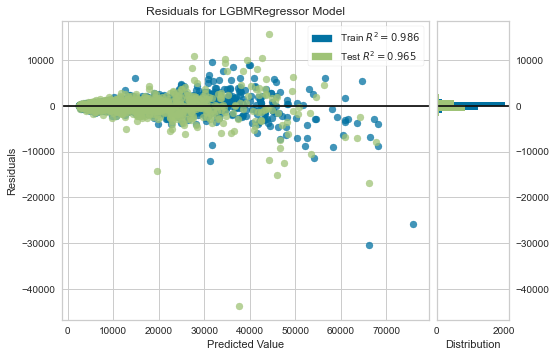

In [28]:
plot_model(tuned_lightgbm)

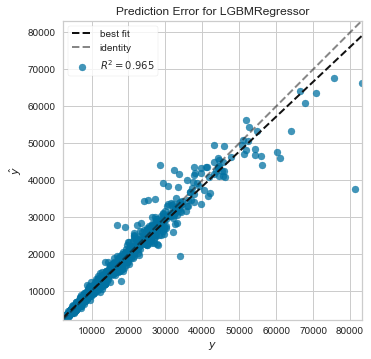

In [29]:
plot_model(tuned_lightgbm, plot='error')

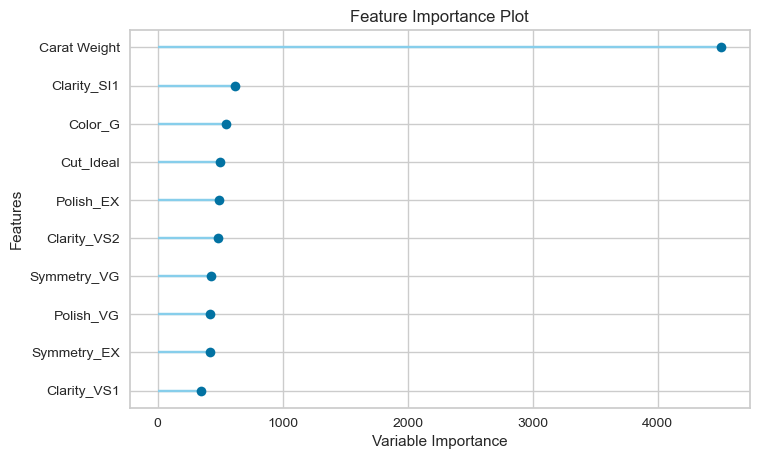

In [30]:
plot_model(tuned_lightgbm, plot='feature')

In [32]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [33]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,781.5572,3816757.2761,1953.6523,0.9652,0.0787,0.0558


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059,6405.760193
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809,5872.412022
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641,10778.368342
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871,2713.936104
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706,21534.553191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906,12936.837831
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235,3493.734351
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058,9611.741400
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091,5227.172140


In [34]:
final_lightgbm=finalize_model(tuned_lightgbm)

In [35]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [36]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,459.9160,1199892.0334,1095.3958,0.9891,0.0498,0.0362


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,1.16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7059,6751.855464
1,1.14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5809,6000.339410
2,1.25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,10641,11388.163423
3,0.79,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2871,2836.345904
4,2.23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,21706,22518.138181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616,1.22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12906,13096.272663
1617,0.83,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3235,3477.710329
1618,1.51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9058,9174.238962
1619,1.16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5091,5194.141841


In [37]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964
...,...,...,...,...,...,...,...,...,...
595,1.02,Very Good,F,SI1,G,G,GIA,5430,5037.008961
596,2.05,Good,G,VS1,G,VG,GIA,26297,26179.818237
597,2.01,Very Good,E,VS2,EX,VG,GIA,27002,26814.480927
598,1.03,Ideal,D,SI1,EX,EX,GIA,6250,6260.277993


In [38]:
from pycaret.utils import *

check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779

In [39]:
save_model(final_lightgbm, 'Final Lightgbm 01Jan2022')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill_value_...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
            

In [40]:
saved_final_lightgbm = load_model('Final Lightgbm 01Jan2022')

Transformation Pipeline and Model Successfully Loaded


In [42]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


In [43]:
from pycaret.utils import check_metric
check_metric(new_prediction.Price, new_prediction.Label, 'R2')

#check de NewPrediction e prediction são iguais, 97,79% de confiança

0.9779